<a href="https://colab.research.google.com/github/sarahouses/proyecto_telecomx2/blob/main/Proyecto_telecomx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diccionario de Variables

    customerID: número de identificación único de cada cliente
    Churn: si el cliente dejó o no la empresa
    gender: género (masculino y femenino)
    SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
    Partner: si el cliente tiene o no una pareja
    Dependents: si el cliente tiene o no dependientes
    tenure: meses de contrato del cliente
    PhoneService: suscripción al servicio telefónico
    MultipleLines: suscripción a más de una línea telefónica
    InternetService: suscripción a un proveedor de internet (tipo)
    OnlineSecurity: suscripción adicional de seguridad en línea
    OnlineBackup: suscripción adicional de respaldo en línea
    DeviceProtection: suscripción adicional de protección del dispositivo
    TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
    StreamingTV: suscripción de televisión por cable
    StreamingMovies: suscripción de streaming de películas
    Contract: tipo de contrato
    PaperlessBilling: si el cliente prefiere recibir la factura en línea
    PaymentMethod: forma de pago
    Charges.Monthly: total de todos los servicios del cliente por mes
    Charges.Total: total gastado por el cliente


## **Preparación de los datos**


In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [100]:
url="https://raw.githubusercontent.com/sarahouses/proyecto_telecomx2/refs/heads/main/datos_tratados.csv"

In [101]:
df = pd.read_csv(url, sep=",", encoding='utf-8')

In [102]:
df.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [103]:
df=df.drop(columns=["customerID"])

In [104]:
#Tipos de datos de las columnas
df.dtypes

Churn                object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [105]:
#Agurpación de No y No service
df_clean=df.copy()
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']
#Hacemos un for para la estandarización de los datos
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')
#One-hot encoding
categoria_columns = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]
df_encoded = pd.get_dummies(df_clean, columns=categoria_columns, drop_first=True)

In [106]:
df_encoded.head()

SeniorCitizen  tenure  Charges.Monthly  Charges.Total  Churn_Yes  \
0            0.0     9.0             65.6         593.30      False   
1            0.0     9.0             59.9         542.40      False   
2            0.0     4.0             73.9         280.85       True   
3            1.0    13.0             98.0        1237.85       True   
4            1.0     3.0             83.9         267.40       True   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True            True              True   
1         True        False           False              True   
2         True        False           False              True   
3         True         True           False              True   
4        False         True           False              True   

   MultipleLines_No phone service  ...  DeviceProtection_Yes  TechSupport_Yes  \
0                           False  ...                 False             True   
1                           False  ...                 False            False   
2                           False  ...                  True            False   
3                           False  ...                  True            False   
4                           False  ...                 False             True   

   StreamingTV_Yes  StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0             True                False               True              False   
1            False                 True              False              False   
2            False                False              False              False   
3             True                 True              False              False   
4             True                False              False              False   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                  True                                  False   
1                 False                                  False   
2                  True                                  False   
3                  True                                  False   
4                  True                                  False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                           False                        True  
1                           False                        True  
2                            True                       False  
3                            True                       False  
4                           False                        True  

[5 rows x 25 columns]

In [107]:
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Churn_Yes', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Verificación de datos nulos

In [108]:
print(df_encoded[['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Churn_Yes', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].isnull().sum())

SeniorCitizen                             0
tenure                                    0
Charges.Monthly                           0
Charges.Total                            11
Churn_Yes                                 0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                           0
StreamingTV_Yes                           0
StreamingMovies_Yes                       0
Contract_One year                         0
Contract_Two year                         0
PaperlessBilling_Yes                      0
PaymentMethod_Credit card (autom

In [109]:
df_encoded = df_encoded.dropna(subset=['Charges.Total'])

In [110]:
#Verificación de que se limpio de manera correcta
df_encoded.isnull().sum()

SeniorCitizen                            0
tenure                                   0
Charges.Monthly                          0
Charges.Total                            0
Churn_Yes                                0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
dtype: int64

In [111]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   float64
 1   tenure                                 7032 non-null   float64
 2   Charges.Monthly                        7032 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Churn_Yes                              7032 non-null   bool   
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
# Conteo y proporción de clientes por clase
conteo = df_encoded['Churn_Yes'].value_counts()
proporcion = df_encoded['Churn_Yes'].value_counts(normalize=True)

print("Conteo por clase:")
print(conteo)

print("\nProporción por clase:")
print(proporcion)

# Evaluar desbalance
if proporcion.min() < 0.4:
    print("\n⚠ Existe un desbalance de clases que podría afectar los modelos predictivos.")
else:
    print("\n✅ Las clases están relativamente balanceadas.")

Conteo por clase:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporción por clase:
Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64

⚠ Existe un desbalance de clases que podría afectar los modelos predictivos.


Columnas no numéricas restantes en X_train: Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Clases después de SMOTE:
Churn_Yes
False    4130
True     4130
Name: count, dtype: int64


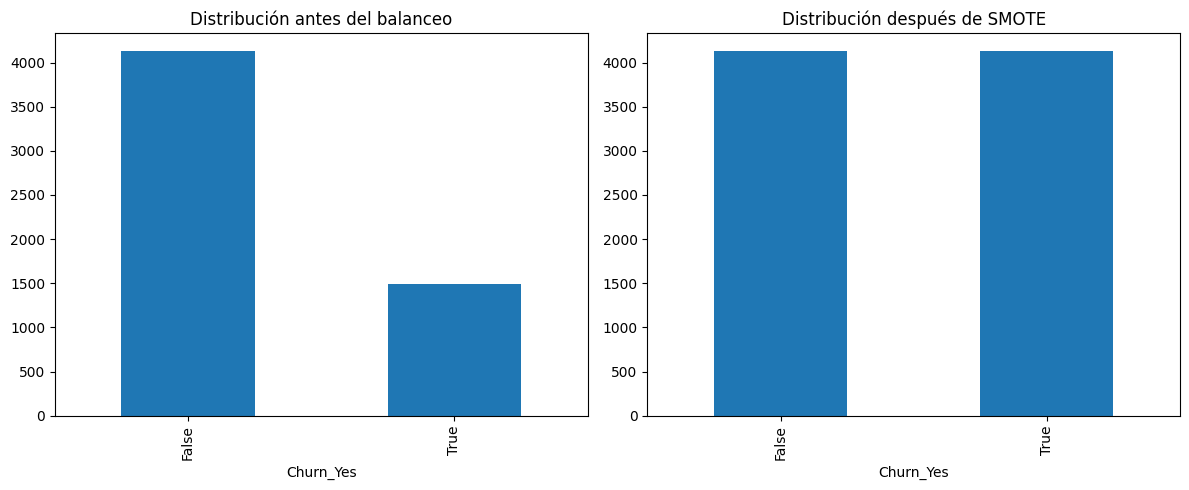

In [114]:
#Balanceo de Clases utilizando smote
#Reemplazar valores NaN utilizando fillna
df_encoded = df_encoded.fillna(0.0)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Imprimir las columnas no numéricas restantes (para verificar)
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas restantes en X_train:", non_numeric_columns)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Imprimir la distribución de clases después de SMOTE
print("\nClases después de SMOTE:")
print(y_train_smote.value_counts())

# Visualizar la distribución de clases antes y después de SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Distribución antes del balanceo')

plt.subplot(1, 2, 2)
y_train_smote.value_counts().plot(kind='bar', title='Distribución después de SMOTE')

plt.tight_layout()
plt.show()

### **Normalización/Estandarización**

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTENC

# ===== 1) Preparación: X, y, columnas num/cat =====
df = df_encoded.copy()

y = df['Churn_Yes'].astype(int)
X = df.drop(columns=['Churn_Yes'])

num_cols = X.select_dtypes(include=['float64','float32','int64','int32']).columns.tolist()
# En tu info, las numéricas son float64; las dummies son bool
# Si quieres fijarlas explícitamente:
# num_cols = ['SeniorCitizen','tenure','Charges.Monthly','Charges.Total']

cat_cols = X.select_dtypes(include=['bool']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ===== 2) SMOTENC SOLO en train, tratando las booleanas como categóricas =====
cat_idx = [X_train.columns.get_loc(c) for c in cat_cols]

sm = SMOTENC(categorical_features=cat_idx, random_state=42)
X_train_res_arr, y_train_res = sm.fit_resample(X_train.values, y_train.values)

# Volvemos a DataFrame con los mismos nombres de columnas
X_train_res = pd.DataFrame(X_train_res_arr, columns=X_train.columns)

# Asegurar que las columnas categóricas vuelvan a 0/1 (por seguridad)
X_train_res[cat_cols] = X_train_res[cat_cols].round().astype(int)
X_test[cat_cols]      = X_test[cat_cols].astype(int)

# ===== 3A) Modelos que REQUIEREN escala → escalar SOLO numéricas =====
scaler = StandardScaler().fit(X_train_res[num_cols])
X_train_scaled = X_train_res.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = scaler.transform(X_train_res[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

# Ejemplo: Regresión Logística (con escala)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000, n_jobs=None)
logreg.fit(X_train_scaled, y_train_res)

y_pred_lr = logreg.predict(X_test_scaled)
y_proba_lr = logreg.predict_proba(X_test_scaled)[:,1]

print("\n=== Logistic Regression (con SMOTENC + StandardScaler) ===")
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_lr), 3))

# ===== 3B) Modelos tipo árbol → SIN escalar (pero sí con datos balanceados) =====
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest (con SMOTENC, sin escalado) ===")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))


=== Logistic Regression (con SMOTENC + StandardScaler) ===
              precision    recall  f1-score   support

           0      0.896     0.766     0.826      1033
           1      0.538     0.754     0.628       374

    accuracy                          0.763      1407
   macro avg      0.717     0.760     0.727      1407
weighted avg      0.801     0.763     0.773      1407

ROC-AUC: 0.835

=== Random Forest (con SMOTENC, sin escalado) ===
              precision    recall  f1-score   support

           0      0.854     0.847     0.850      1033
           1      0.586     0.599     0.593       374

    accuracy                          0.781      1407
   macro avg      0.720     0.723     0.721      1407
weighted avg      0.783     0.781     0.782      1407

ROC-AUC: 0.825


LAS METRICAS DEMUESTRAN QUE:

Clase 1 = churners (quienes cancelan).

Logistic (SMOTENC + escalado):

Recall 1 = 0.754 → detecta ~75% de quienes cancelan (pocas fugas).

Precision 1 = 0.538 → de cada 100 que marca como churn, ~54 realmente lo son (más falsos positivos).

F1 1 = 0.628 → buen balance en la minoritaria.

ROC-AUC = 0.835 → ligeramente mejor separando clases que RF.

Random Forest (SMOTENC, sin escalado):

Recall 1 = 0.599 → detecta ~60% de churners (se le escapan más).

Precision 1 = 0.586 → menos falsos positivos que la LR.

F1 1 = 0.593 → algo menor que LR en la minoritaria.

Accuracy 0.781 y weighted F1 0.782 → mejor “promedio” global que LR, pero el dataset está desbalanceado (74% clase 0), así que accuracy/weighted pueden engañar.

Por ende se utilizara la regresión logistica

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un objeto OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajusta el encoder a tus datos de entrenamiento
ohe.fit(X_train)

# Transforma tus datos de entrenamiento y prueba
X_train_ohe = ohe.transform(X_train)
X_test_ohe = ohe.transform(X_test)

# Estandarización
scaler = StandardScaler()

# Normalización
scaler = MinMaxScaler()
scaler.fit(X_train_ohe)
X_train_scaled = scaler.transform(X_train_ohe)
X_test_scaled = scaler.transform(X_test_ohe)

## **Correlación y Selección de Variables**


In [117]:
corr = df_encoded.corr()

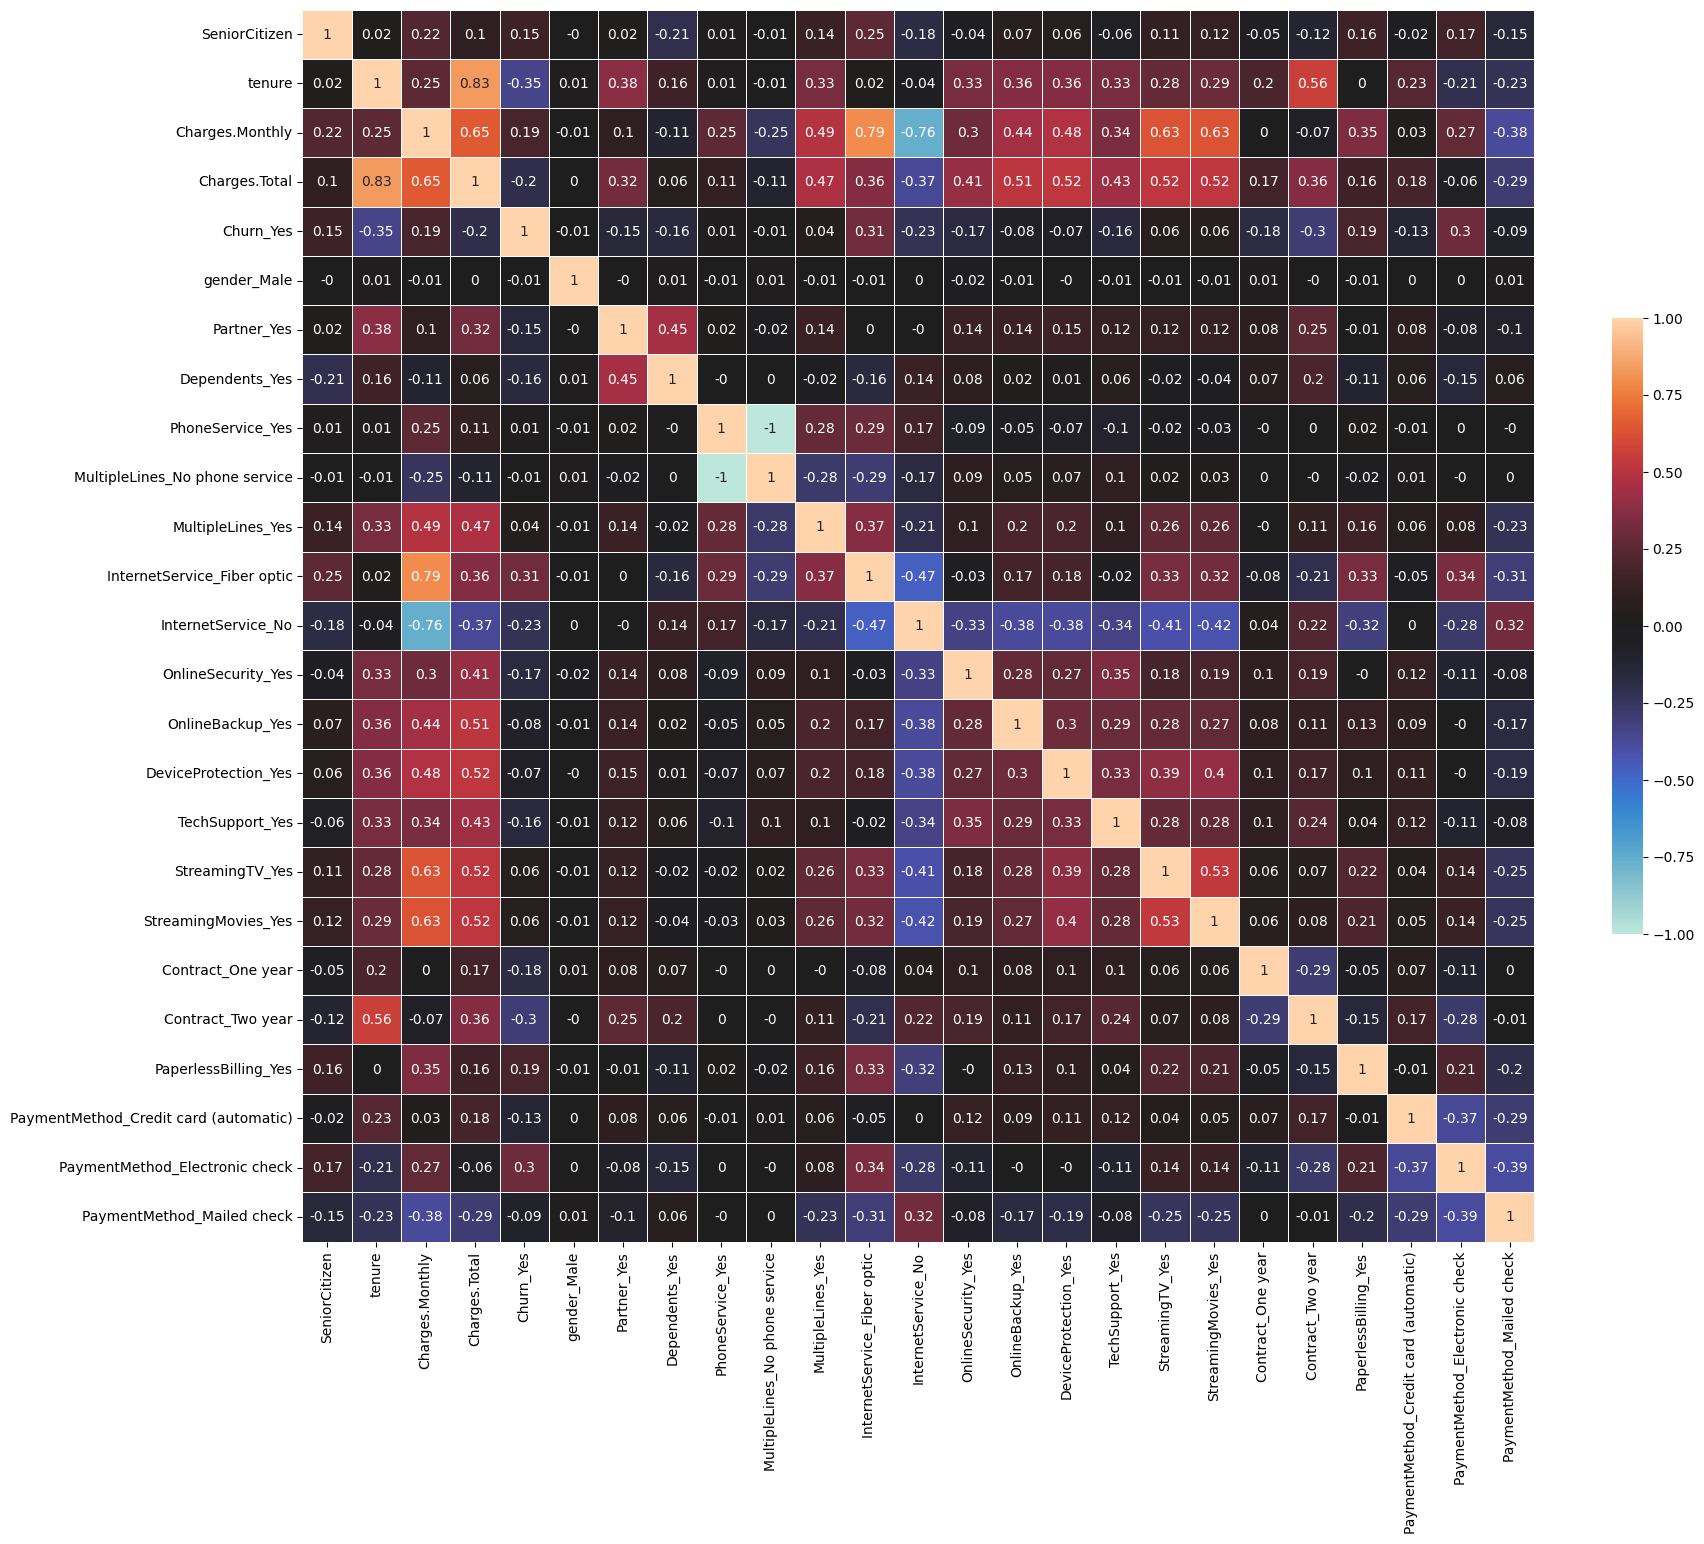

In [118]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

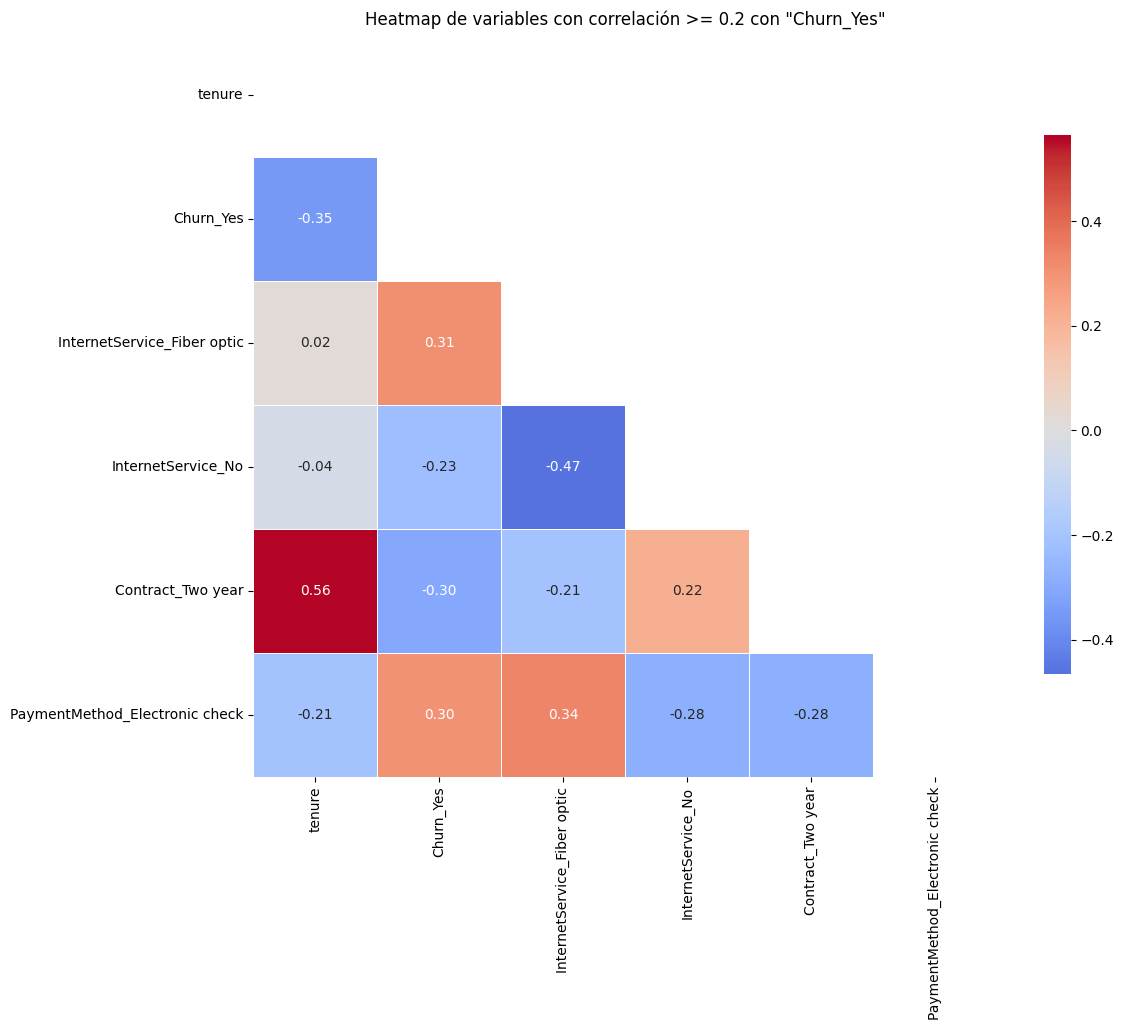

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

target_var = 'Churn_Yes'
limpiar = 0.2
col_target = corr[target_var]
if isinstance(col_target, pd.DataFrame):
    col_target = col_target.iloc[:, 0]  # tomar la primera columna

var_relevantes = col_target.index[col_target.abs() >= limpiar].tolist()

if target_var not in var_relevantes:
    var_relevantes.append(target_var)

corr_filtro = corr.loc[var_relevantes, var_relevantes]

mascara = np.triu(np.ones_like(corr_filtro, dtype=bool))


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limpiar} con "{target_var}"')
plt.show()



In [119]:
import pandas as pd
import numpy as np

# Si ya tienes tu DF numérico/one-hot:
corr = df_encoded.corr(numeric_only=True)['Churn_Yes'].sort_values(ascending=False)

top_pos = corr.drop('Churn_Yes').head(10)      # mayores positivas
top_neg = corr.drop('Churn_Yes').tail(10)      # más negativas

print("Top correlaciones POSITIVAS con churn:")
print(top_pos.round(3))
print("\nTop correlaciones NEGATIVAS con churn:")
print(top_neg.round(3))

# (Opcional) filtra por magnitud mínima, p. ej. |r| >= 0.15
umbral = 0.15
candidatas = corr[abs(corr) >= umbral].drop('Churn_Yes').sort_values(key=np.abs, ascending=False)
print("\nCandidatas por |correlación| >= 0.15:")
print(candidatas.round(3))


Top correlaciones POSITIVAS con churn:
InternetService_Fiber optic       0.307
PaymentMethod_Electronic check    0.301
Charges.Monthly                   0.193
PaperlessBilling_Yes              0.191
SeniorCitizen                     0.151
StreamingTV_Yes                   0.063
StreamingMovies_Yes               0.061
MultipleLines_Yes                 0.040
PhoneService_Yes                  0.012
gender_Male                      -0.009
Name: Churn_Yes, dtype: float64

Top correlaciones NEGATIVAS con churn:
PaymentMethod_Credit card (automatic)   -0.135
Partner_Yes                             -0.150
Dependents_Yes                          -0.163
TechSupport_Yes                         -0.165
OnlineSecurity_Yes                      -0.171
Contract_One year                       -0.178
Charges.Total                           -0.199
InternetService_No                      -0.228
Contract_Two year                       -0.302
tenure                                  -0.354
Name: Churn_Yes, dt

In [120]:
df_encoded.columns


Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Churn_Yes', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [121]:
##Análisis de Multicolinealidad

X = df_encoded.drop(columns=["Churn_Yes"])

X_const = add_constant(X)

# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature         VIF
8                        PhoneService_Yes         inf
9          MultipleLines_No phone service         inf
3                         Charges.Monthly  866.089640
11            InternetService_Fiber optic  148.500814
12                     InternetService_No  104.213701
18                    StreamingMovies_Yes   24.156394
17                        StreamingTV_Yes   24.080019
4                           Charges.Total   10.811490
2                                  tenure    7.584453
10                      MultipleLines_Yes    7.289761
15                   DeviceProtection_Yes    6.924754
14                       OnlineBackup_Yes    6.796678
16                        TechSupport_Yes    6.476508
13                     OnlineSecurity_Yes    6.338349
20                      Contract_Two year    2.652328
23         PaymentMethod_Electronic check    1.976032
24             PaymentMethod_Mailed check    1.857058
19                      Contract_One year    1.625784
22  PaymentMethod_Credit card (automatic)    1.560999
6                             Partner_Yes    1.462988
7                          Dependents_Yes    1.381598
21                   PaperlessBilling_Yes    1.208455
1                           SeniorCitizen    1.153220
5                             gender_Male    1.002106
0                                   const    0.000000

In [122]:

import numpy as np
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfm = df_encoded.copy()


# --- 1) Elimina target ---
target = 'Churn_Yes' if 'Churn_Yes' in dfm.columns else 'Churn'
X = dfm.drop(columns=[target]).copy()

# --- 2) Evitar dummy trap / columnas problemáticas ---
to_drop = []

# a) Quitar 'No phone service' (casi determinística con PhoneService_Yes)
if 'MultipleLines_No phone service' in X.columns:
    to_drop.append('MultipleLines_No phone service')

# b) InternetService_* -> elimina 1 como baseline
internet_dummies = [c for c in ['InternetService_DSL','InternetService_Fiber optic','InternetService_No'] if c in X.columns]
if len(internet_dummies) >= 2:
    # quita una (elige la que prefieras como baseline)
    if 'InternetService_DSL' in internet_dummies:
        to_drop.append('InternetService_DSL')
    else:
        to_drop.append('InternetService_No')

X = X.drop(columns=list(dict.fromkeys(to_drop)), errors='ignore')

# --- 3) Asegurar que TODO sea numérico: convertir bool -> uint8 ---
bool_cols = X.select_dtypes(include=['bool']).columns
if len(bool_cols):
    X[bool_cols] = X[bool_cols].astype('uint8')

# Si quedara alguna 'object' por accidente, one-hotéala:
obj_cols = X.select_dtypes(include=['object','category']).columns
if len(obj_cols):
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

# --- 4) VIF ---
Xv = add_constant(X, has_constant='add')

vif_rows = []
for i, col in enumerate(Xv.columns):
       vif_rows.append({'feature': col, 'VIF': variance_inflation_factor(Xv.values, i)})

vif_df = pd.DataFrame(vif_rows).sort_values('VIF', ascending=False)
print("Eliminadas para evitar colinealidad:", to_drop)
print(vif_df)


Eliminadas para evitar colinealidad: ['MultipleLines_No phone service', 'InternetService_No']
                                  feature        VIF
0                                   const  38.968665
3                         Charges.Monthly  22.872213
4                           Charges.Total  10.803153
10            InternetService_Fiber optic   7.658029
2                                  tenure   7.583667
18                      Contract_Two year   2.648624
16                    StreamingMovies_Yes   2.458872
15                        StreamingTV_Yes   2.437465
21         PaymentMethod_Electronic check   1.975617
14                        TechSupport_Yes   1.884392
22             PaymentMethod_Mailed check   1.856879
11                     OnlineSecurity_Yes   1.848647
13                   DeviceProtection_Yes   1.822944
12                       OnlineBackup_Yes   1.770501
9                       MultipleLines_Yes   1.647105
17                      Contract_One year   1.624130
8    

## **Modelos Predictivos**

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
#Entrenamiento
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7511848341232228
ROC AUC: 0.8454813582220259
Matriz de Confusión:
 [[1130  419]
 [ 106  455]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



## **Interpretación y Conclusiones**

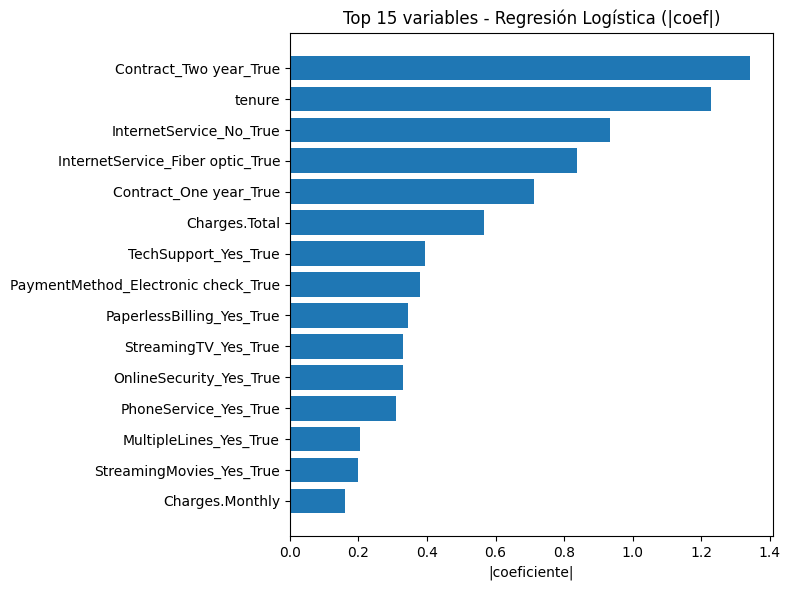

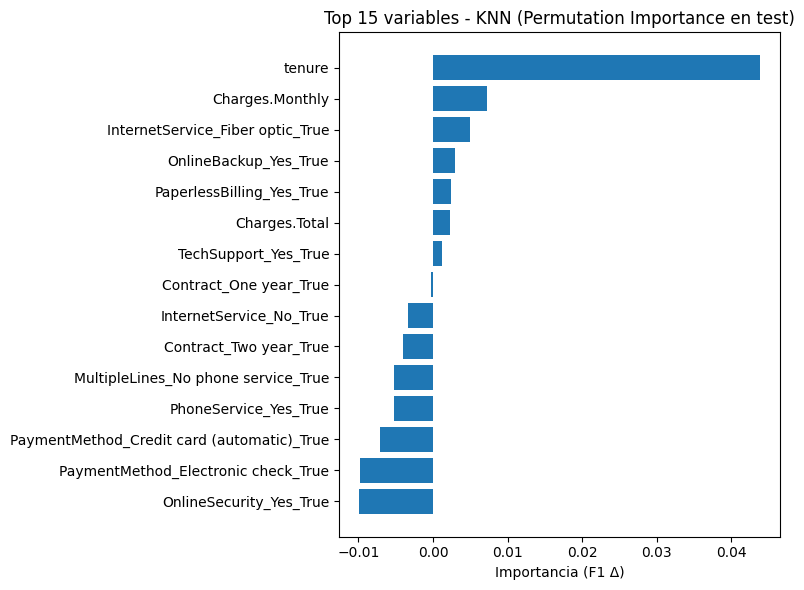

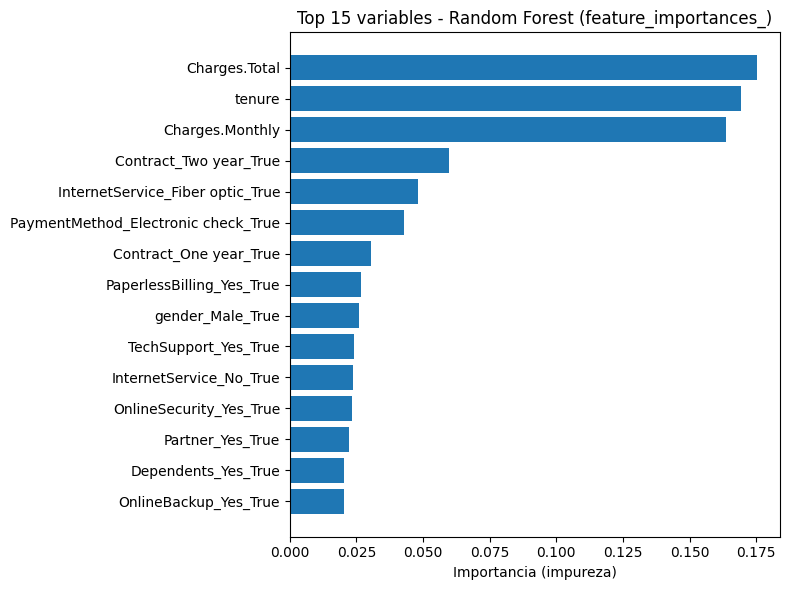

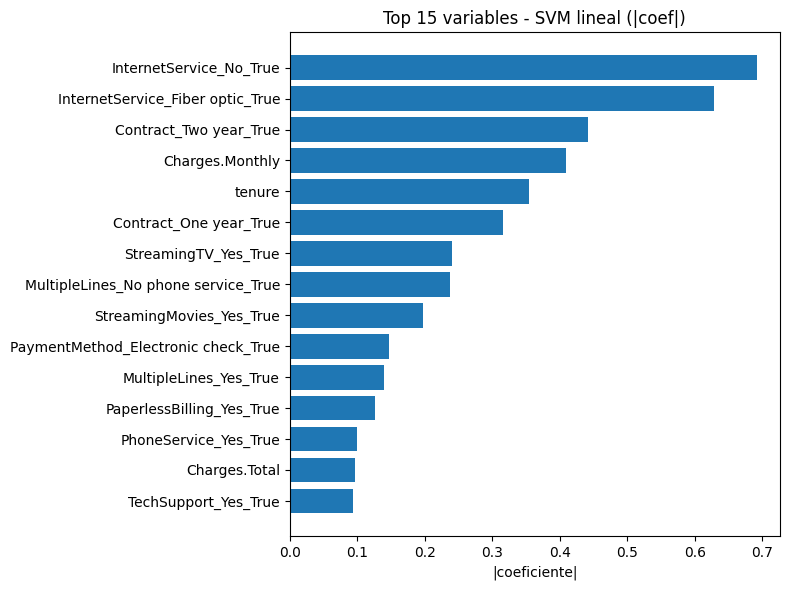


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.907     0.726     0.806      1033
           1      0.512     0.794     0.623       374

    accuracy                          0.744      1407
   macro avg      0.709     0.760     0.715      1407
weighted avg      0.802     0.744     0.758      1407

ROC-AUC: 0.845

=== KNN ===
              precision    recall  f1-score   support

           0      0.823     0.858     0.840      1033
           1      0.555     0.489     0.520       374

    accuracy                          0.760      1407
   macro avg      0.689     0.674     0.680      1407
weighted avg      0.751     0.760     0.755      1407

ROC-AUC: 0.794

=== Random Forest ===
              precision    recall  f1-score   support

           0      0.824     0.909     0.864      1033
           1      0.648     0.463     0.540       374

    accuracy                          0.790      1407
   macro avg      0.736     0.686

In [131]:
# ==========================
# Gráficas de importancia
# ==========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# ---------- 1) Datos y prepro ----------
DF = 'df_encoded' if 'df_encoded' in globals() else 'df'
df_base = globals()[DF].copy()

# Target a 0/1
target_col = 'Churn_Yes' if 'Churn_Yes' in df_base.columns else 'Churn'
if target_col == 'Churn':
    y = df_base['Churn'].map({'Yes':1,'No':0}).astype(int)
else:
    y = df_base['Churn_Yes'].astype(int)

X = df_base.drop(columns=[target_col], errors='ignore')

# Columnas
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop'
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train_p = preprocess.fit_transform(X_train)
X_test_p  = preprocess.transform(X_test)
feat_names = preprocess.get_feature_names_out()
feat_names = np.array([n.replace('cat__','').replace('num__','') for n in feat_names])

# 2) Modelos
logit = LogisticRegression(max_iter=5000, class_weight='balanced', n_jobs=-1).fit(X_train_p, y_train)
knn   = KNeighborsClassifier(n_neighbors=15, weights='distance').fit(X_train_p, y_train)
rf    = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced').fit(X_train_p, y_train)
svm_l = LinearSVC(class_weight='balanced', random_state=42).fit(X_train_p, y_train)

#  3) Importancias / coeficientes
# Logística: |coef|
imp_lr = pd.Series(np.abs(logit.coef_.ravel()), index=feat_names, name='LR_|coef|').sort_values(ascending=False)

# KNN: permutation importance en test
pi_knn = permutation_importance(knn, X_test_p, y_test, n_repeats=10, random_state=42, scoring='f1')
imp_knn = pd.Series(pi_knn.importances_mean, index=feat_names, name='KNN_PI').sort_values(ascending=False)

# Random Forest: feature_importances_
imp_rf = pd.Series(rf.feature_importances_, index=feat_names, name='RF_importance').sort_values(ascending=False)

# SVM lineal: |coef|
imp_svm = pd.Series(np.abs(svm_l.coef_.ravel()), index=feat_names, name='SVM_|coef|').sort_values(ascending=False)

#  4) Función de gráfico
def plot_top(series, title, top=15, xlabel='Importancia'):
    top_s = series.head(top).sort_values(ascending=True)
    plt.figure(figsize=(8, max(4, 0.4*len(top_s))))
    plt.barh(top_s.index, top_s.values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

# 5) Gráficas (una por modelo)
plot_top(imp_lr,  'Top 15 variables - Regresión Logística (|coef|)', xlabel='|coeficiente|')
plot_top(imp_knn, 'Top 15 variables - KNN (Permutation Importance en test)', xlabel='Importancia (F1 Δ)')
plot_top(imp_rf,  'Top 15 variables - Random Forest (feature_importances_)', xlabel='Importancia (impureza)')
plot_top(imp_svm, 'Top 15 variables - SVM lineal (|coef|)', xlabel='|coeficiente|')

# 6) (Opcional) Métricas rápidas
def report(name, model):
    yhat = model.predict(X_test_p)
    proba = getattr(model, "predict_proba", None)
    auc = None
    if proba is not None:
        auc = roc_auc_score(y_test, proba(X_test_p)[:,1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, yhat, digits=3))
    if auc is not None:
        print("ROC-AUC:", round(auc, 3))

report("Logistic Regression", logit)
report("KNN", knn)
report("Random Forest", rf)
report("Linear SVM", svm_l)


# Informe

## 1) Desempeño de modelos
| Modelo | Accuracy | ROC-AUC | Recall (clase 1) |
|---|---:|---:|---:|
| **Regresión Logística** | 0.744 | **0.845** | **0.794** |
| **SVM lineal** | 0.743 | **0.845** | **0.799** |
| Random Forest | **0.790** | 0.828 | 0.463 |
| KNN | 0.760 | 0.794 | 0.489 |

**Conclusión operativa:** si la prioridad es **detectar churners** (alto *recall*), usar **Logística o SVM lineal**. RF sirve para ranking de variables, pero se le escapan más churners.

---

## 2) Factores que más influyen (consenso entre modelos)

**Riesgo ↑ (más probabilidad de cancelar):**
- **Charges.Monthly** alto (precio mensual)
- **InternetService_Fiber optic**
- **PaymentMethod_Electronic check**
- **PaperlessBilling_Yes**
- **Tenure bajo** (clientes nuevos)

**Riesgo ↓ (protectores):**
- **Contract_One year** y **Contract_Two year**
- **Tenure alto**
- **TechSupport_Yes**, **OnlineSecurity_Yes**
- (A menudo) **InternetService_No** → clientes solo telefonía

> Nota: correlación ≠ causalidad. “Electronic check” y “paperless” pueden ser **marcadores** de fricción/engagement.

---

## 3) Interpretación por modelo (resumen)
- **Logística / SVM lineal**: coeficientes (|coef|) destacan **contrato**, **tenure**, **tipo de internet** y **precio**.
- **Random Forest**: importancia alta en **Charges.Total / Monthly**, **tenure**, **contrato**, **fibra** y **electronic check**.
- **KNN (Permutation Importance)**: refuerza **tenure** y **Charges.Monthly** como ejes de proximidad.

---

## 4) Estrategias de retención (accionables)
1. **Precio / valor**: ofertas de **downgrade/paquetes** o **descuentos temporales** para clientes con **Charges.Monthly** alto (especialmente fibra + tenure bajo).
2. **Contratos**: migrar **mes a mes → anual/bianual** con incentivos (3–6 meses de beneficio).
3. **Onboarding & soporte**: foco en **tenure < 3 meses**; activar pruebas de **TechSupport / OnlineSecurity**.
4. **Pagos**: incentivar cambio **Electronic check → automático** (tarjeta/débito); mejorar recordatorios/UX de facturación digital.
5. **Umbral del modelo**: en Logística/SVM ajustar el **threshold** según presupuesto (más *recall* si quieres capturar más churners).

---

## 5) Cierre
Los motores del churn en este dataset son **precio mensual**, **tipo de internet (fibra)**, **método de pago**, **antigüedad** y **tipo de contrato**. Para operación: **Logística o SVM** como modelo principal (alto *recall*) y **Random Forest** para apoyo en importancia de variables. Monitorear **PR-AUC / recall@top-k** tras implementar las acciones.
